# Porftolio Optimization Mix

## Import Libraries

In [1]:
#!pip install seaborn
import os
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from datetime import datetime
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from pandas_datareader import DataReader

%matplotlib inline

In [2]:
df_stocks_top = pd.read_csv('df_stocks.csv')
df_stocks_random = pd.read_csv('df_stocks_random.csv')

In [4]:
df_stocks_top['Date'] =  pd.to_datetime(df_stocks_top['Date'], format='%Y-%m-%d')
df_stocks_random['Date'] =  pd.to_datetime(df_stocks_random['Date'], format='%Y-%m-%d')

In [5]:
df_stocks_top.set_index('Date', inplace=True)
df_stocks_random.set_index('Date', inplace=True)

In [7]:
df_stocks_random.tail()

APTV        BWA         CL        DRE        DVA         FIS  \
Date                                                                            
2018-11-30  71.900002  39.580002  63.520000  28.459999  66.059998  107.949997   
2018-12-03  74.709999  40.700001  63.759998  28.830000  66.379997  109.120003   
2018-12-04  71.580002  37.650002  63.080002  28.020000  64.070000  106.120003   
2018-12-06  69.870003  37.279999  63.230000  28.830000  61.820000  105.790001   
2018-12-07  67.089996  35.740002  62.709999  28.520000  58.959999  104.620003   

                   HP         TMO         UTX         VZ  
Date                                                      
2018-11-30  60.599998  249.550003  121.839996  60.299999  
2018-12-03  62.290001  251.979996  123.599998  58.160000  
2018-12-04  60.590000  243.889999  120.870003  58.090000  
2018-12-06  60.160000  242.039993  121.449997  58.080002  
2018-12-07  60.740002  235.860001  119.449997  57.680000

In [111]:
df_stocks = pd.concat([df_stocks_top, df_stocks_random], axis=1)

In [112]:
log_return = np.log(df_stocks/df_stocks.shift(1))

In [113]:
log_return.mean() * len(log_return)

AAPL     0.523156
AMZN     0.940320
BRK-B    0.449746
FB       0.296316
GOOGL    0.321136
JNJ      0.450630
JPM      0.558699
MFST    -5.069510
V        0.618164
XOM      0.115155
APTV    -0.001004
BWA     -0.123747
CL       0.037179
DRE      0.430266
DVA     -0.152660
FIS      0.595094
HP       0.255518
TMO      0.541081
UTX      0.295320
VZ       0.367484
dtype: float64

In [114]:
log_return.cov() * len(log_return)

AAPL      AMZN     BRK-B        FB     GOOGL       JNJ       JPM  \
AAPL   0.157577  0.098288  0.044186  0.077893  0.083310  0.022041  0.053578   
AMZN   0.098288  0.237049  0.044388  0.134299  0.120075  0.023518  0.050378   
BRK-B  0.044186  0.044388  0.080943  0.039469  0.047438  0.033039  0.075796   
FB     0.077893  0.134299  0.039469  0.239894  0.112057  0.022414  0.047562   
GOOGL  0.083310  0.120075  0.047438  0.112057  0.136429  0.030277  0.051408   
JNJ    0.022041  0.023518  0.033039  0.022414  0.030277  0.063994  0.031424   
JPM    0.053578  0.050378  0.075796  0.047562  0.051408  0.031424  0.130612   
MFST   0.064358  0.205788  0.044359  0.060860  0.066607  0.032365 -0.009052   
V      0.073588  0.088237  0.050392  0.081439  0.083357  0.029518  0.058176   
XOM    0.034352  0.035314  0.044649  0.033746  0.034959  0.027821  0.049467   
APTV   0.069035  0.079860  0.060587  0.070987  0.070696  0.030429  0.085205   
BWA    0.076269  0.070594  0.073058  0.062794  0.072088  0.032735  0.104613   
CL     0.019908  0.021348  0.023764  0.015690  0.023321  0.024462  0.016029   
DRE    0.030045  0.030725  0.027162  0.023832  0.030669  0.021890  0.018407   
DVA    0.037435  0.042936  0.041397  0.034980  0.039595  0.027323  0.049294   
FIS    0.046276  0.057942  0.040964  0.053103  0.054866  0.028344  0.047820   
HP     0.053902  0.064152  0.061632  0.046848  0.041334  0.025826  0.082218   
TMO    0.054752  0.060138  0.047062  0.042008  0.061183  0.035131  0.056307   
UTX    0.040846  0.046975  0.045889  0.038337  0.049547  0.026600  0.049763   
VZ     0.009080  0.007806  0.029600  0.010737  0.014470  0.029528  0.025052   

            MFST         V       XOM      APTV       BWA        CL       DRE  \
AAPL    0.064358  0.073588  0.034352  0.069035  0.076269  0.019908  0.030045   
AMZN    0.205788  0.088237  0.035314  0.079860  0.070594  0.021348  0.030725   
BRK-B   0.044359  0.050392  0.044649  0.060587  0.073058  0.023764  0.027162   
FB      0.060860  0.081439  0.033746  0.070987  0.062794  0.015690  0.023832   
GOOGL   0.066607  0.083357  0.034959  0.070696  0.072088  0.023321  0.030669   
JNJ     0.032365  0.029518  0.027821  0.030429  0.032735  0.024462  0.021890   
JPM    -0.009052  0.058176  0.049467  0.085205  0.104613  0.016029  0.018407   
MFST   15.660875  0.092150  0.026038  0.107493  0.006289 -0.012125  0.010182   
V       0.092150  0.117713  0.034346  0.077803  0.074312  0.025984  0.037986   
XOM     0.026038  0.034346  0.089823  0.040659  0.048462  0.022142  0.026013   
APTV    0.107493  0.077803  0.040659  0.258174  0.194746  0.025101  0.037723   
BWA     0.006289  0.074312  0.048462  0.194746  0.286310  0.021959  0.038551   
CL     -0.012125  0.025984  0.022142  0.025101  0.021959  0.085666  0.038369   
DRE     0.010182  0.037986  0.026013  0.037723  0.038551  0.038369  0.097984   
DVA     0.086998  0.041127  0.029332  0.050730  0.061543  0.025533  0.031861   
FIS     0.064485  0.060246  0.029562  0.056053  0.060984  0.025061  0.029481   
HP      0.011363  0.046033  0.098587  0.079508  0.114606  0.024161  0.029640   
TMO    -0.028760  0.066903  0.034317  0.076860  0.082888  0.024457  0.029767   
UTX     0.051956  0.048712  0.031391  0.072227  0.074671  0.020873  0.024618   
VZ      0.050823  0.014010  0.023656  0.015155  0.026542  0.028340  0.031427   

            DVA       FIS        HP       TMO       UTX        VZ  
AAPL   0.037435  0.046276  0.053902  0.054752  0.040846  0.009080  
AMZN   0.042936  0.057942  0.064152  0.060138  0.046975  0.007806  
BRK-B  0.041397  0.040964  0.061632  0.047062  0.045889  0.029600  
FB     0.034980  0.053103  0.046848  0.042008  0.038337  0.010737  
GOOGL  0.039595  0.054866  0.041334  0.061183  0.049547  0.014470  
JNJ    0.027323  0.028344  0.025826  0.035131  0.026600  0.029528  
JPM    0.049294  0.047820  0.082218  0.056307  0.049763  0.025052  
MFST   0.086998  0.064485  0.011363 -0.028760  0.051956  0.050823  
V      0.041127  0.060246  0.046033  0.066903  0.048712  0

In [115]:
np.random.seed(101)
num_of_ite = 50000
all_weights = np.zeros((num_of_ite,len(log_return.columns)))
port_return = np.zeros(num_of_ite)
port_vol = np.zeros(num_of_ite)
sharpe_ratio = np.zeros(num_of_ite)

for i in range(num_of_ite):
    weights = np.array(np.random.random(20))
    weights = weights / np.sum(weights)
    all_weights[i,:] = weights
    port_return[i] = np.sum((log_return.mean() * weights) *len(log_return))
    port_vol[i] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * len(log_return), weights)))
    sharpe_ratio[i] = port_return[i]/port_vol[i]

### Distribution of Simulated Portfolios

Below we show the various portfolio profiles from the Monte Carlo simulation with their Expected Return, Expected Volatility and accompanying Sharpe Ratios.

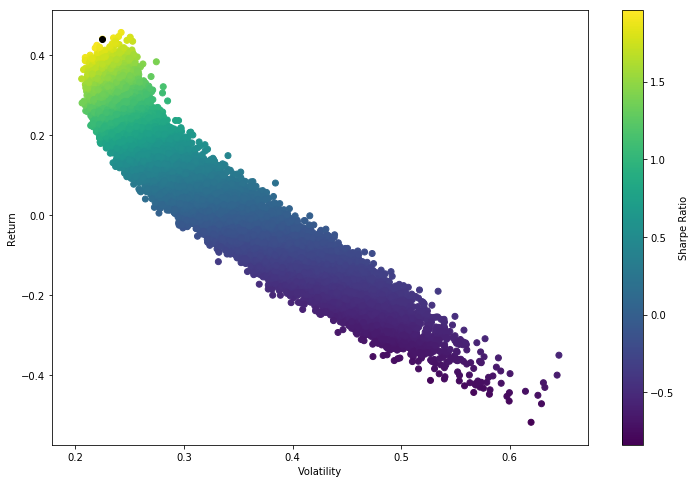

In [116]:
max_port_return = port_return[sharpe_ratio.argmax()]
max_port_vol = port_vol[sharpe_ratio.argmax()]


plt.figure(figsize=(12,8))
plt.scatter(x=port_vol,y=port_return,c=sharpe_ratio)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(x=max_port_vol,y=max_port_return,c='black')

## Mathematical Optimization for Asset Allocation

In [117]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * len(log_return)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * len(log_return), weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

### Maximum Sharpe Ratio

In [118]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [119]:
def check_sum(weights):
    return np.sum(weights) - 1

In [120]:
cons = ({'type':'eq','fun': check_sum})
noa = len(log_return.columns)
bounds = tuple((0, 1) for x in range(noa))
init_guess = noa * [1. / noa,]
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [121]:
opt_ret_vol_sr = pd.DataFrame(get_ret_vol_sr(opt_results.x).round(4)).T
names = ['Return', 'Volatility', 'Sharpe Ratio']
opt_ret_vol_sr.columns=names
opt_ret_vol_sr

Return  Volatility  Sharpe Ratio
0  0.5792      0.2166        2.6733

In [122]:
optimal_sharpe = pd.DataFrame(opt_results['x'].round(4)).T
optimal_sharpe.columns=list(log_return.columns)
optimal_sharpe

AAPL    AMZN  BRK-B   FB  GOOGL     JNJ     JPM  MFST       V  XOM  APTV  \
0   0.0  0.2051    0.0  0.0    0.0  0.2642  0.0857   0.0  0.0026  0.0   0.0   

   BWA   CL     DRE  DVA     FIS   HP     TMO  UTX      VZ  
0  0.0  0.0  0.1144  0.0  0.2015  0.0  0.0122  0.0  0.1142

### Alternative way to maximize Sharpe Ratio 

In [123]:
def statistics(weights):
    '''Returns portfolio statistics
    Parameters
    ==========
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(log_return.mean()*weights)*len(log_return)
    pvol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*len(log_return),weights)))
    return np.array([pret,pvol,pret/pvol])

In [124]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return statistics(weights)[2] * -1

In [125]:
#add constraint that all parameters (weights) add up to 1
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
#add constraint that each parameter (weights) are within 0 and 1
noa = len(log_return.columns)
bnds = tuple((0, 1) for x in range(noa))
#starting parameter list (initial guesses for the weights)
x0 = noa * [1. / noa,]

In [126]:
opts = sco.minimize(min_func_sharpe, x0, method='SLSQP', bounds=bnds, constraints=cons)

In [127]:
port_weights = opts.x.round(4)

In [128]:
optimal_sharpe = pd.DataFrame(opts['x'].round(4)).T
optimal_sharpe.columns=list(log_return.columns)
optimal_sharpe

AAPL    AMZN  BRK-B   FB  GOOGL     JNJ     JPM  MFST       V  XOM  APTV  \
0   0.0  0.2051    0.0  0.0    0.0  0.2642  0.0857   0.0  0.0026  0.0   0.0   

   BWA   CL     DRE  DVA     FIS   HP     TMO  UTX      VZ  
0  0.0  0.0  0.1144  0.0  0.2015  0.0  0.0122  0.0  0.1142

In [129]:
optimal_ret_vol_sr = pd.DataFrame(statistics(opts['x']).round(4)).T
names = ['Return', 'Volatility', 'Sharpe Ratio']
optimal_ret_vol_sr.columns=names
optimal_ret_vol_sr

Return  Volatility  Sharpe Ratio
0  0.5792      0.2166        2.6733

In [138]:
log_return_norm = log_return[11:]
prices_normalized = log_return_norm.dropna() / log_return_norm.dropna().iloc[0]

In [139]:
# Weigh the crypto-portfolio with the optimal weights determined above
portfolio_array = np.dot(prices_normalized, port_weights)

In [140]:
# Create a Dataframe of the normalized portfolio time series.
portfolio_df = pd.DataFrame(data = portfolio_array, index = prices_normalized.index, columns=['Stock_Portfolio']).round(3)

In [141]:
portfolio_df.head()

Stock_Portfolio
Date                       
2016-01-20            1.000
2016-01-21           -0.674
2016-01-22           -2.573
2016-01-25            0.297
2016-01-26           -1.812

In [142]:
portfolio_df.to_csv('stock_portfolio.csv')